In [1]:
!pip install ucimlrepo  --quiet
from visualization_utils import *
from file_utils import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets
# metadata 
metadata = predict_students_dropout_and_academic_success.metadata

# variable information 
variable_info = predict_students_dropout_and_academic_success.variables

df = X
df['dropout'] = y

print(f"{df.shape[0]} entries with {df.shape[1]} features")

4424 entries with 37 features


In [3]:
predict_students_dropout_and_academic_success.variables['name']
ds_vars = predict_students_dropout_and_academic_success.variables['name']
ds_desc = predict_students_dropout_and_academic_success.variables['description']
# need to create forward mappings for each one of the variables

hard_vars = {'Application mode',
'Application order',
'Previous qualification (grade)',
'Admission grade',
'Age at enrollment',
"Curricular units 1st sem (credited)",
"Curricular units 1st sem (enrolled)",
"Curricular units 1st sem (evaluations)",
"Curricular units 1st sem (approved)",
"Curricular units 1st sem (grade)",
"Curricular units 1st sem (without evaluations)",
"Curricular units 2nd sem (credited)",
"Curricular units 2nd sem (enrolled)",
"Curricular units 2nd sem (evaluations)",
"Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (grade)",
"Curricular units 2nd sem (without evaluations)",
"Unemployment rate",
"Inflation rate",
"GDP",
"Target",
}

variable_map = generate_variable_map(hard_vars, ds_vars, ds_desc)

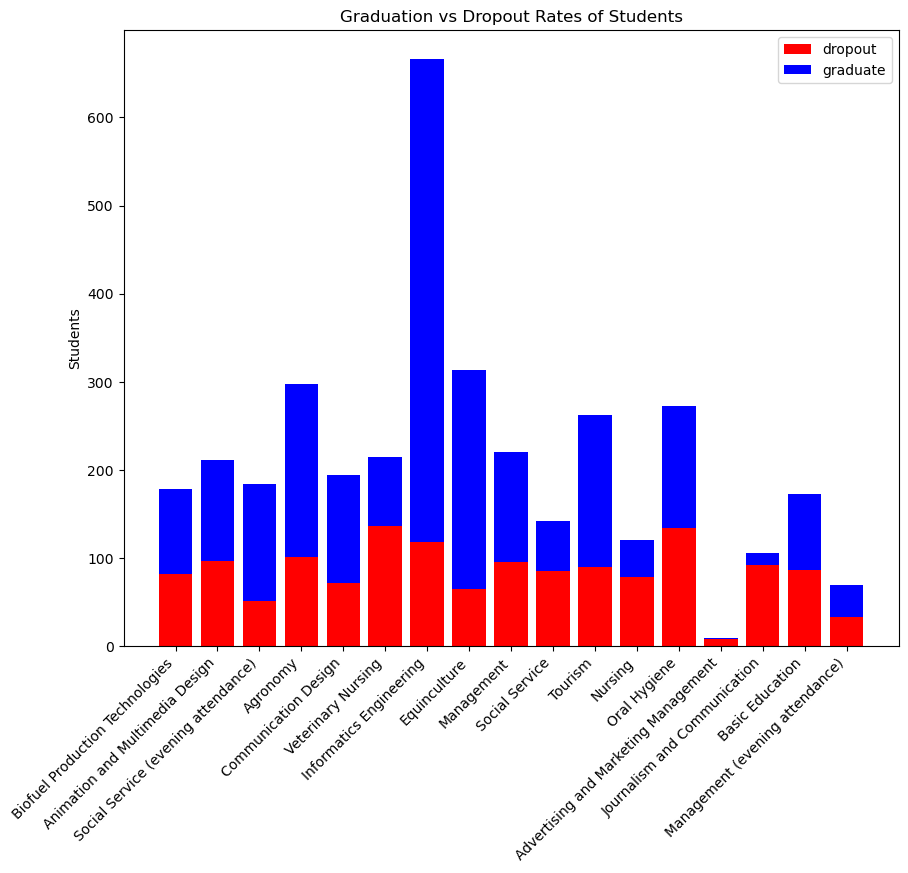

In [4]:
finished_df = df[df['dropout'].isin(['Dropout', 'Graduate'])]
generate_stacked_bar_graph(finished_df, variable_map)

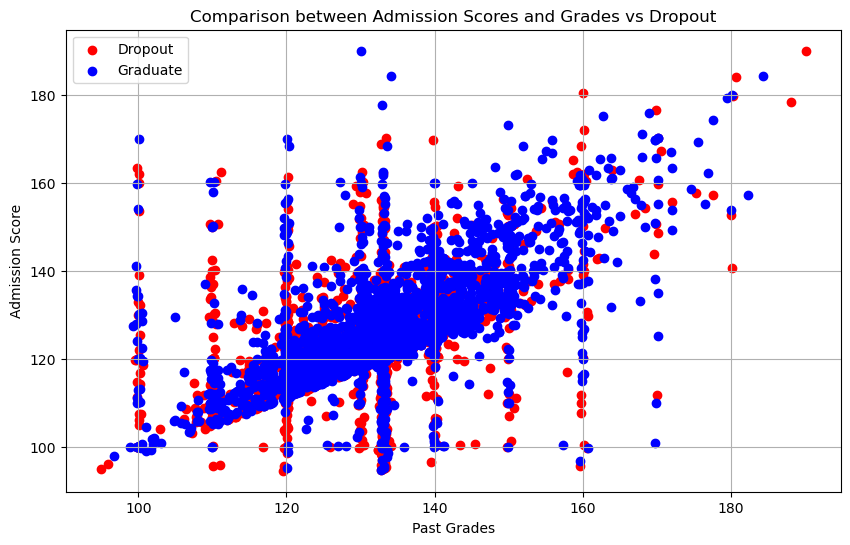

In [5]:
PREV_QUAL = 'Previous qualification (grade)'
ADMISSION_GRADE = 'Admission grade' 
tmp = df[[PREV_QUAL, ADMISSION_GRADE, 'dropout']]
finished_df = tmp[tmp['dropout'].isin(['Dropout', 'Graduate'])]

jitter_plot(finished_df)

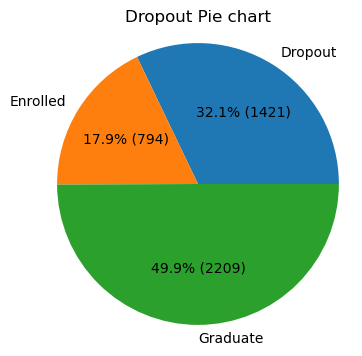

In [6]:
pie_chart(df['dropout'])


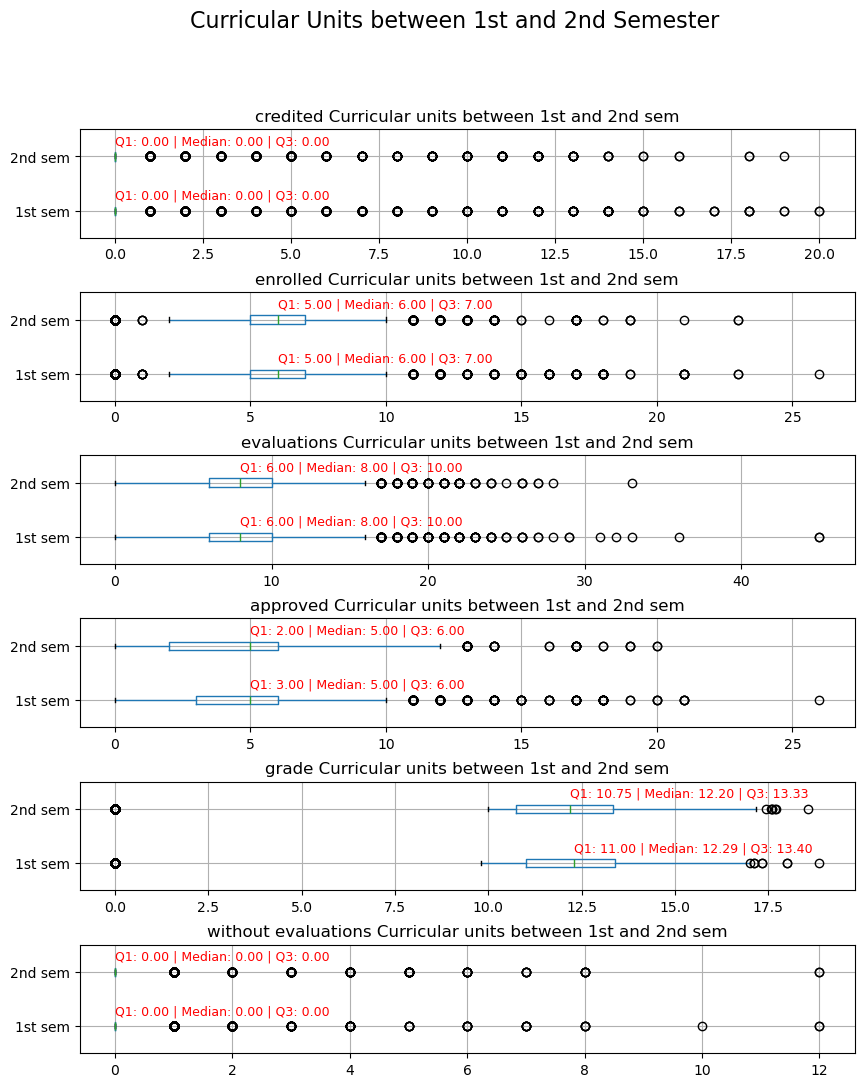

In [7]:
curriculum_units = [
    "Curricular units 1st sem (credited)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (without evaluations)",
]
first_sem_curriculum = {unit for unit in curriculum_units if '1' in unit}
second_sem_curriculum = set(curriculum_units) - first_sem_curriculum

plot_semester_compare_bp(df, curriculum_units)

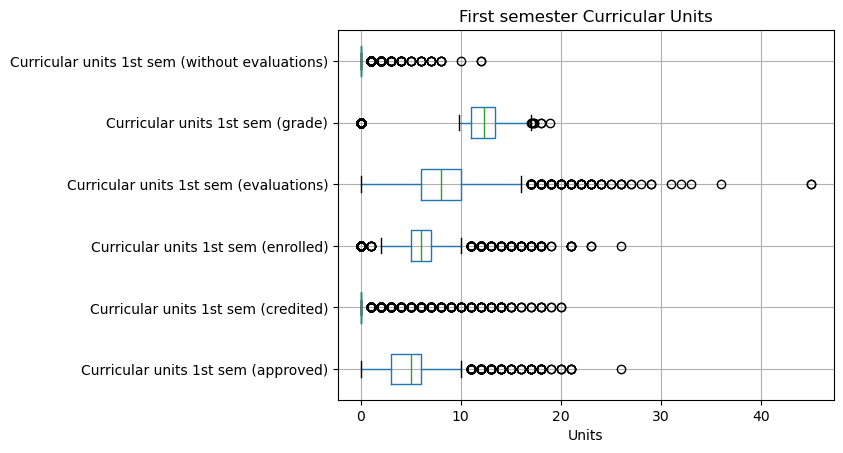

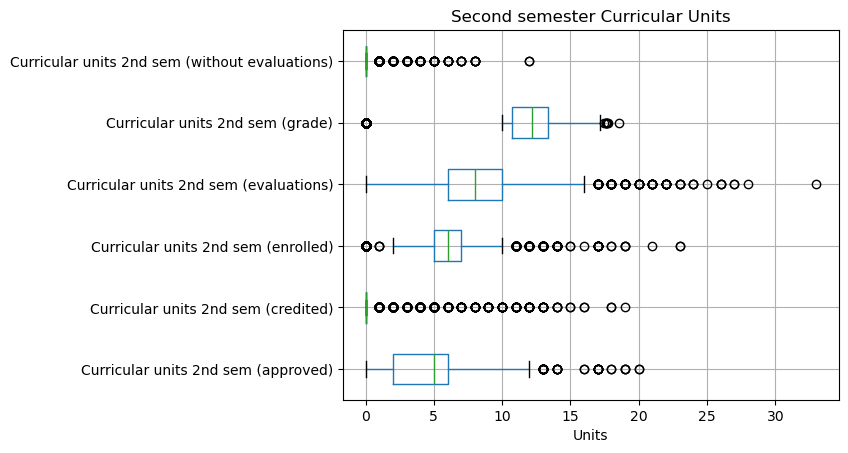

In [8]:
# will not plot first and semester comparison
df[sorted(list(first_sem_curriculum))].boxplot(vert=False)
plt.title("First semester Curricular Units")
plt.xlabel("Units")
plt.show()
df[sorted(list(second_sem_curriculum))].boxplot(vert=False)
plt.title("Second semester Curricular Units")
plt.xlabel("Units")
plt.show()


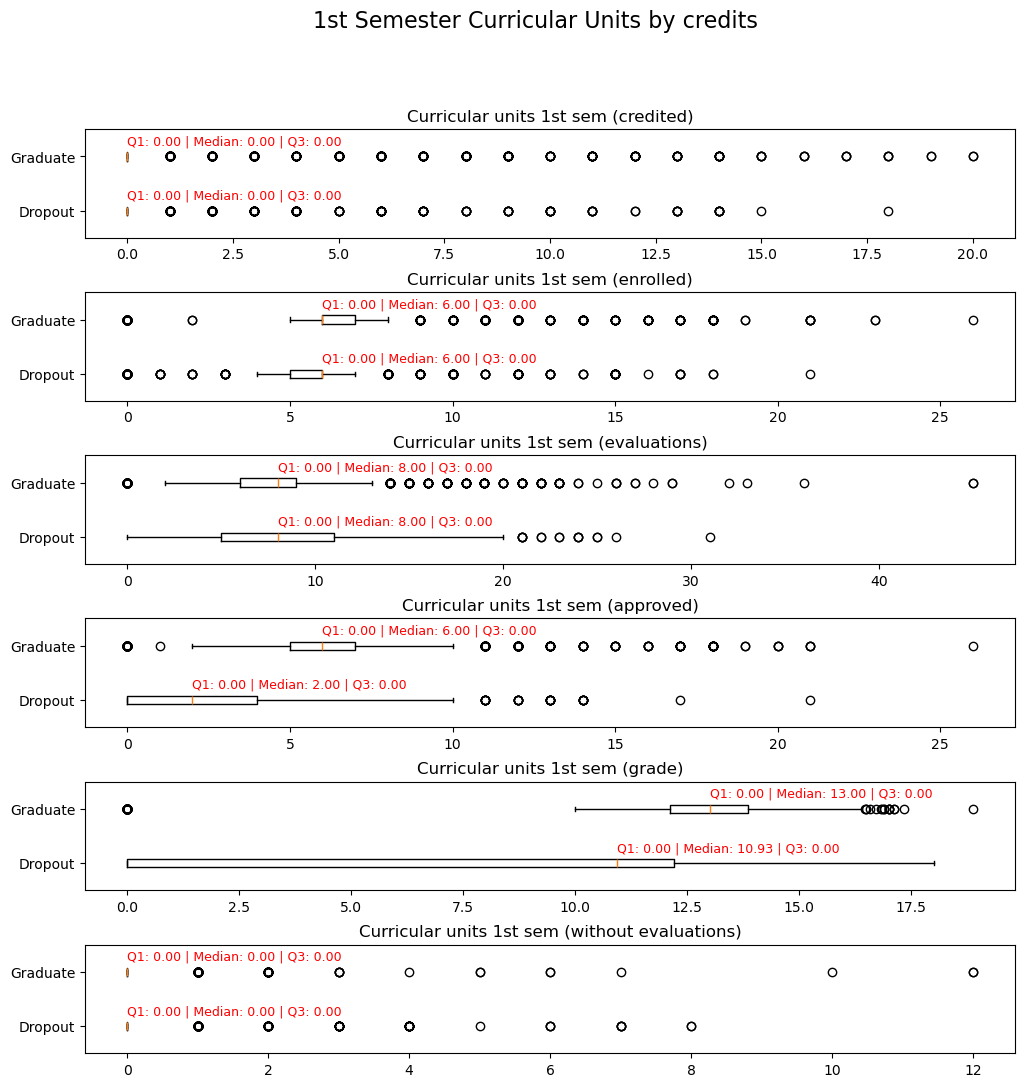

In [9]:
# need to plot by first and second semester

filtered_units = [x for x in curriculum_units if  '1' in x] 
plot_df = df[list(filtered_units) + ['dropout']]
clean_text = lambda x: re.sub(r'(Curricular units 1st sem |\(|\))', '', x)
plot_df = plot_df.rename(columns={x: clean_text(x) for x in filtered_units})
units = [clean_text(x) for x in filtered_units]
# plot_df.boxplot(vert=False)

fig, axes = plt.subplots(len(filtered_units), 1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes):
    dropout = plot_df[plot_df['dropout'] == "Dropout"][units[i]].to_numpy()
    graduate = plot_df[plot_df['dropout'] == "Graduate"][units[i]].to_numpy()
    
    ax.boxplot([dropout, graduate], labels = ["Dropout", "Graduate"], vert=False)
    title = f'Curricular units 1st sem ({units[i]})'
    ax.set_title(f"{title}")
    dropout_q1 = np.percentile(dropout, 0.25)
    dropout_median = np.median(dropout)
    dropout_q3 = np.percentile(dropout, 0.75)
    
    graduate_q1 = np.percentile(graduate, 0.25)
    graduate_median = np.median(graduate)
    graduate_q3 = np.percentile(graduate, 0.75)
    
    y_pos = 1

    graduate_summary = f'Q1: {graduate_q1:.2f} | Median: {graduate_median:.2f} | Q3: {graduate_q3:.2f}'
    dropout_summary = f'Q1: {dropout_q1:.2f} | Median: {dropout_median:.2f} | Q3: {dropout_q3:.2f}'
    ax.text(dropout_median, 1 + 0.4, dropout_summary, verticalalignment='top', color='red', fontsize=9)
    ax.text(graduate_median, 2 + 0.4, graduate_summary, verticalalignment='top', color='red', fontsize=9)

# Set a common title for the whole figure
fig.suptitle("1st Semester Curricular Units by credits", fontsize=16)

# Display the plots
plt.show()